# Bank Customer Categorization 

Historical data were gathered from bank customers to determine whether
a customer is a good or bad credit risk for a home equity loan. Bad risk
customers are more likely to default on the loan.

**Main Goal  :** Creating a model to identify the bad customer.

**"impme"** module include all necessary libraries for this project.

**Definition of variables**


A home equity loan is a loan for a fixed amount of money that is secured by your home. You repay the loan with equal monthly payments over a fixed term, just like your original mortgage. 

**BAD:** The response(or Y) variable is BAD, which is coded as 0 (good risk) or 1 (bad risk).

**LOAN:** The amount of the loan requested.

**MORTDUE:** How much the customer needs to pay on their mortgage.

**VALUE:** Assessed valuation (An assessed value is the dollar value assigned to a property to measure applicable taxes).


**REASON:** Debt consolidation or home improvement (DebtCon or HomeImp) .

(DebtCon :It is the conversion of short term debts into long term or indefinite debt.)

**JOB:** Broad job category.

**YOJ:** Years on the job

**DEROG:** Number of derogatory reports

**DELINQ:** The number of delinquent trade lines 

**CLAGE:** Age of oldest trade line (oldest tradeline).

**NINQ:** Number of recent credit inquiries (Soft inquiries are usually made when you request a credit report or credit score for yourself.)
**CLNO:** Number of trade lines.

**DEBTINC:** Debt to income ratio (The monthly total debt divided by the total monthly income.)
    

In [2]:
from impme import*

df= pd.read_csv("hmelq.csv")

# Info

In [3]:
dfInfo = Basic_Information(df)


Head

   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  

Describe

          count           mean           std      min       25%        50%  \
bad      3576.0       0.199385      0.399594     0.00      0.00      0.000   
loan     3576.0   18529.697987  11262.834060  1100.00  11000.00  16200.000   
mortdue  3262.0   74013.907992  44016.833772  2619.00  46700.25  65858.000   
value    3512.0  101076.922759  54865.2

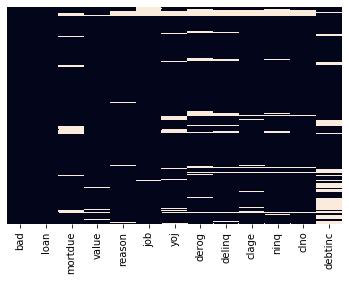

In [4]:
dfInfo.Info()

In [5]:
dfnum = df.select_dtypes(exclude=['object'])

Visualization of the distribution of numerical variables.

In [6]:
dfvis = Vis(dfnum)

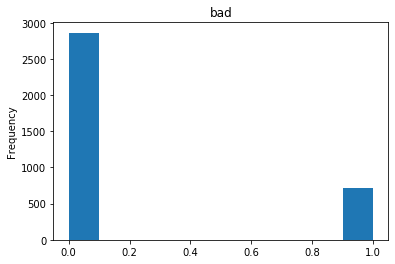

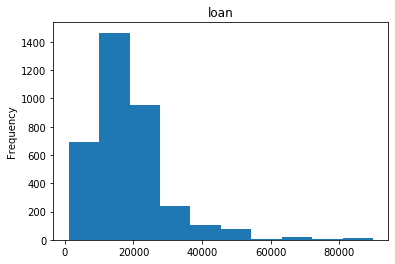

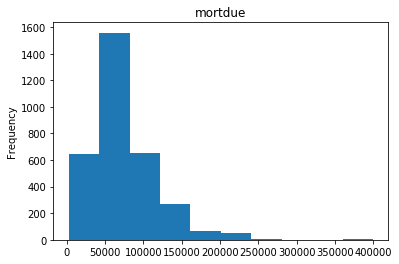

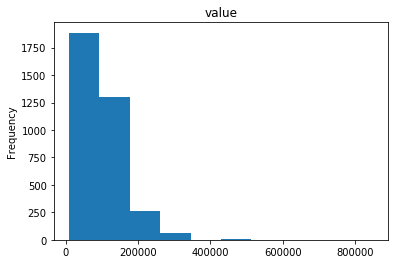

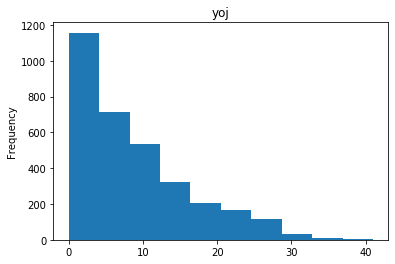

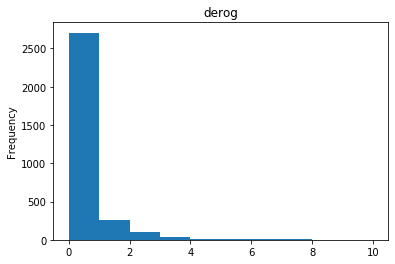

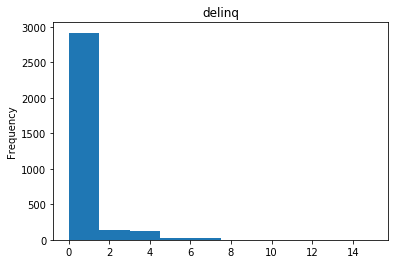

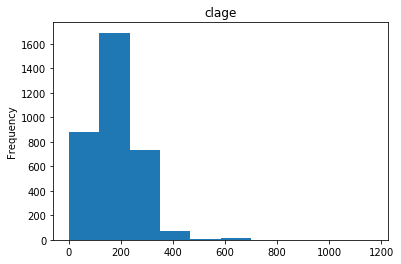

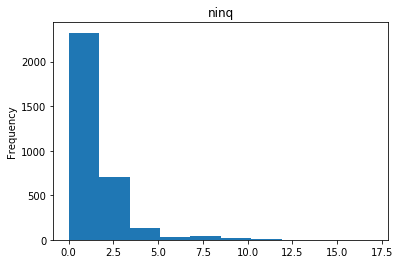

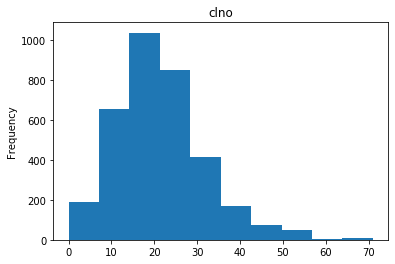

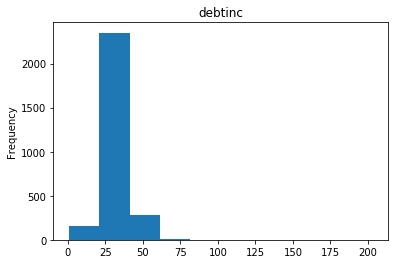

In [7]:
dfvis.hist()

In [8]:
for i in dfnum:
    print(i)
    print(dfnum[i].value_counts())

bad
0    2863
1     713
Name: bad, dtype: int64
loan
15000    65
10000    56
25000    50
20000    42
12000    33
         ..
59200     1
51000     1
46900     1
38700     1
2100      1
Name: loan, Length: 474, dtype: int64
mortdue
50000.0    6
55000.0    6
45000.0    5
62000.0    5
42000.0    5
          ..
54045.0    1
64804.0    1
79185.0    1
89226.0    1
53504.0    1
Name: mortdue, Length: 3095, dtype: int64
value
80000.0     9
65000.0     8
125000.0    7
85000.0     6
60000.0     6
           ..
111287.0    1
103430.0    1
155688.0    1
75446.0     1
72704.0     1
Name: value, Length: 3302, dtype: int64
yoj
0.00    247
1.00    223
4.00    215
2.00    209
5.00    205
       ... 
3.80      1
7.20      1
9.20      1
4.30      1
0.25      1
Name: yoj, Length: 86, dtype: int64
derog
0.0     2706
1.0      265
2.0       98
3.0       35
4.0       14
6.0       10
5.0        8
7.0        7
8.0        3
10.0       2
9.0        1
Name: derog, dtype: int64
delinq
0.0     2517
1.0      398
2.0 

In [9]:
dff = df.copy()

# Preprocess

In [10]:
# The target variable looks'int64' but it's not, we did it categorical.

dff["bad"]= dff["bad"].astype("object")

Looking at the histogram, describe, and value_counts, we noticed that some variables are continuous and some are discrete.

Considering their definitions, we decided to fill the continuous with the mean and the discrete ones with the most repeating value (0)

In [11]:
dfmis = Missing(dff)

In [12]:
# loan', 'mortdue', 'value', 'yoj' looks like continuous.
# We checked the missing values by printing them.

ls = ['loan', 'mortdue', 'value', 'yoj']

for i in ls:
    dfmis.meann(i)

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64


In [13]:
# Same precess .
ls = ['delinq','derog',  'clage', 'clno', 'debtinc','ninq']

for i in ls:
    dfmis.zero(i)

bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog      427
delinq       0
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog        0
delinq       0
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog        0
delinq       0
clage        0
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog        0
delinq       0
clage        0
ninq       303
clno         0
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog        0
delinq       0
clage        0
ninq       303
cln

We filled in categorical missing values as 'other'.

In [14]:
ls = ['reason', 'job']

for i in ls:
    dfmis.cat(i)

bad          0
loan         0
mortdue      0
value        0
reason       0
job        167
yoj          0
derog        0
delinq       0
clage        0
ninq         0
clno         0
debtinc      0
dtype: int64
bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64


In [15]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   object 
 1   loan     3576 non-null   int64  
 2   mortdue  3576 non-null   float64
 3   value    3576 non-null   float64
 4   reason   3576 non-null   object 
 5   job      3576 non-null   object 
 6   yoj      3576 non-null   float64
 7   derog    3576 non-null   float64
 8   delinq   3576 non-null   float64
 9   clage    3576 non-null   float64
 10  ninq     3576 non-null   float64
 11  clno     3576 non-null   float64
 12  debtinc  3576 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 363.3+ KB


We are done with missing values .

According to target value, we made crosstab operation of object values and looked at chi square values.To see if there is a meaningful relationship between the two variables.

In [16]:
dfp = PreProcess(dff)

In [17]:
ls =['reason', 'job']

for i in ls:
    
    dfp.crosstab("bad",i)


reason  DebtCon  HomeImp  Other   All
bad                                  
0          1931      814    118  2863
1           440      244     29   713
All        2371     1058    147  3576
[['Chi-Square test', 9.304347121658731], ['P - value', 0.15717137167903963]]
job  Mgr  Office  Other  ProfEx  Sales  Self   All
bad                                               
0    354     494   1252     639     43    81  2863
1    107      75    346     128     23    34   713
All  461     569   1598     767     66   115  3576
[['Chi-Square test', 43.25094656695884], ['P - value', 2.0473707134227633e-05]]


There is a relationship between the job variable and the target variable.

In [18]:
df.columns

Index(['bad', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc'],
      dtype='object')

In [19]:
ls =['loan', 'mortdue', 'value','yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc']

for i in ls:
    dfp.groupbi('bad',i)

bad
0    18931.645127
1    16915.708275
Name: loan, dtype: float64
bad
0    75136.838766
1    69504.860580
Name: mortdue, dtype: float64
bad
0    102392.607727
1     95793.884804
Name: value, dtype: float64
bad
0    9.012497
1    8.110457
Name: yoj, dtype: float64
bad
0    0.122249
1    0.664797
Name: derog, dtype: float64
bad
0    0.212714
1    1.102384
Name: delinq, dtype: float64
bad
0    177.292106
1    144.886115
Name: clage, dtype: float64
bad
0    0.937827
1    1.680224
Name: ninq, dtype: float64
bad
0    20.777157
1    20.426367
Name: clno, dtype: float64
bad
0    29.795170
1    13.646251
Name: debtinc, dtype: float64


In [20]:
# derog,delinq,ninq,debtinc

We grouped the target value according to the mean of the numerical values.Then  we separated the different ones.

Shapiro-Wilk normality test.

In [21]:
ls =['loan', 'mortdue', 'value','yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc']

for i in ls:
    dfp.shap(i)

loan
0.8493258953094482 0.0
Sample does not come from normal (Gaussian) distribution (reject H0)
mortdue
0.8743524551391602 0.0
Sample does not come from normal (Gaussian) distribution (reject H0)
value
0.8472325205802917 0.0
Sample does not come from normal (Gaussian) distribution (reject H0)
yoj
0.907394528388977 3.3140708681281924e-42
Sample does not come from normal (Gaussian) distribution (reject H0)
derog
0.31198251247406006 0.0
Sample does not come from normal (Gaussian) distribution (reject H0)
delinq
0.42445874214172363 0.0
Sample does not come from normal (Gaussian) distribution (reject H0)
clage
0.9434936046600342 5.745086868596736e-35
Sample does not come from normal (Gaussian) distribution (reject H0)
ninq
0.6676706671714783 0.0
Sample does not come from normal (Gaussian) distribution (reject H0)
clno
0.9745039343833923 8.498622371227817e-25
Sample does not come from normal (Gaussian) distribution (reject H0)
debtinc
0.8160082101821899 0.0
Sample does not come from normal 

Non normal distrubution . We can group them and do a chi-square test.


# Data Visualization

If the number of delaying monthly payments is greater than 5, he / she is put in the bad risk group.
The number of delaying payments per month is 5 and the value of properties of customers who are identified as good risk is different from others.

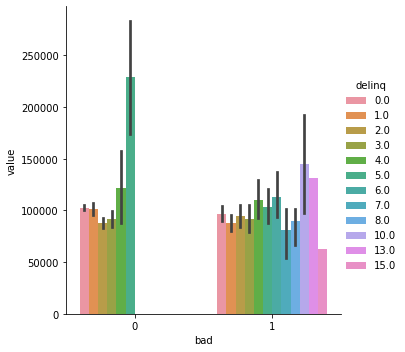

In [22]:
import seaborn as sns
sns.catplot(x="bad", y="value", hue="delinq", kind="bar", data=dff);


# Feature Engineering

I converted to have received negative reports or not. The not-negative value is too high.

In [23]:
dff['derog'].value_counts() 

0.0     3133
1.0      265
2.0       98
3.0       35
4.0       14
6.0       10
5.0        8
7.0        7
8.0        3
10.0       2
9.0        1
Name: derog, dtype: int64

In [24]:
derog_obj=[]

for i in dff['derog']: 
    
    if i == 0 :
    
        derog_obj.append('no_neg')
    
    else: 
    
        derog_obj.append('neg')
    
dff['derog_obj'] = derog_obj

In [25]:
dff['derog_obj'].value_counts()

no_neg    3133
neg        443
Name: derog_obj, dtype: int64

I set it according to the Data Visualization section information.

In [26]:
dff['delinq'].value_counts() 

0.0     2868
1.0      398
2.0      142
3.0       69
4.0       51
5.0       21
6.0       15
7.0        5
8.0        3
10.0       2
15.0       1
13.0       1
Name: delinq, dtype: int64

In [27]:
delinq_obj=[]

for i in dff['delinq']: 
    
    if i == 0 :
    
        delinq_obj.append('not_late')
    
    elif 0 < i <= 5 : 
    
        delinq_obj.append('under_5_late')
        
    else:
        
        delinq_obj.append('over_5_late')
    
dff['delinq_obj'] = delinq_obj

In [28]:
dff['delinq_obj'].value_counts()

not_late        2868
under_5_late     681
over_5_late       27
Name: delinq_obj, dtype: int64

The distribution seems a little more homogeneous. I divided the number of loan inquiries into none, 1-2 or more than 2.

In [29]:
dff['ninq'].value_counts() 

0.0     1822
1.0      805
2.0      469
3.0      235
4.0       93
5.0       44
6.0       34
7.0       29
10.0      15
8.0       13
9.0        8
11.0       5
13.0       2
17.0       1
12.0       1
Name: ninq, dtype: int64

In [30]:
ninq_obj=[]

for i in dff['ninq']: 
    
    if i == 0 :
    
        ninq_obj.append('not_inq')
    
    elif 1<= i <=2: 
    
        ninq_obj.append('inq12')
        
    else :
        
        ninq_obj.append('inq_over_2')
    
dff['ninq_obj'] = ninq_obj

In [31]:
dff['ninq_obj'].value_counts()

not_inq       1822
inq12         1274
inq_over_2     480
Name: ninq_obj, dtype: int64

In [32]:
dff['debtinc'].max() 
# A = 0 - 10 , B = 10 - 20 , C = 20 - 30, D = 30 - 40 , E = 40 - 50, F = 50 - 203.312

203.312

I grouped 10 until 50 to separate bins.

In [33]:
bins = [0,10,20,30,40,50,203.312]

scores = [ "A", "B", "C", "D", "E", "F"]

In [34]:
dff['debtinc_score'] = pd.cut(dff['debtinc'], bins, labels= scores) 

In [35]:
pd.crosstab([dff['reason'],dff['bad']], dff['debtinc_score'], margins=True).style.background_gradient(cmap="Oranges")

# A : 0 - 10  group with a debt ratio did not request a deferral.
# F : 50 - 203.312 group with the debt ratio and the group demanding deferral are all identified as bad risk.
# C : 20 - 30 group with the ratio and the majority of the group requesting debt deferral were well defined as risk.

In [36]:
dff.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc,derog_obj,delinq_obj,ninq_obj,debtinc_score
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042,no_neg,not_late,not_inq,D
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479,no_neg,not_late,not_inq,D
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354,no_neg,not_late,inq12,C
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992,no_neg,not_late,inq12,D
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327,no_neg,not_late,not_inq,D


We can test the newly created categorical data by chi-square test.

In [37]:
ls =['derog_obj', 'delinq_obj','ninq_obj','debtinc_score']

for i in ls:
    dfp.crosstab("bad",i)

derog_obj  neg  no_neg   All
bad                         
0          233    2630  2863
1          210     503   713
All        443    3133  3576
[['Chi-Square test', 238.94760067117932], ['P - value', 1.5634370248743565e-50]]
delinq_obj  not_late  over_5_late  under_5_late   All
bad                                                  
0               2469            0           394  2863
1                399           27           287   713
All             2868           27           681  3576
[['Chi-Square test', 384.0185512338447], ['P - value', 7.613233486811979e-80]]
ninq_obj  inq12  inq_over_2  not_inq   All
bad                                       
0          1017         303     1543  2863
1           257         177      279   713
All        1274         480     1822  3576
[['Chi-Square test', 110.71836715339968], ['P - value', 1.4416111959916953e-21]]
debtinc_score   A    B    C     D    E   F   All
bad                                             
0              12   94  667  13

All of them have a relation to the target variable

# Logistic Regression

We chose categorical variables that have a relationship to the target variable.

In [38]:
X = dff[["derog_obj","delinq_obj","ninq_obj","debtinc_score","job"]]

y = dff["bad"]

In [39]:
X_encoded = pd.get_dummies(X , prefix_sep = '_')

In [40]:
X_encoded

,derog_obj_neg,derog_obj_no_neg,delinq_obj_not_late,delinq_obj_over_5_late,delinq_obj_under_5_late,ninq_obj_inq12,ninq_obj_inq_over_2,ninq_obj_not_inq,debtinc_score_A,debtinc_score_B,debtinc_score_C,debtinc_score_D,debtinc_score_E,debtinc_score_F,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3572,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3573,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3574,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
from sklearn.preprocessing import LabelEncoder

y_encoded = LabelEncoder().fit_transform(y)

In [42]:
y_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y_encoded, test_size = 0.2, random_state = 42)
X_train.shape

(2860, 20)

In [44]:
y_test.shape

(716,)

In [45]:
model = Model(dff)

Time  : 0.015600099999998562
Confusion Matrix  :
[[568  23]
 [ 52  73]]
Accuracy  : 0.8952513966480447
CV Score  : 0.8744913928012519
Model Report : 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       591
           1       0.76      0.58      0.66       125

    accuracy                           0.90       716
   macro avg       0.84      0.77      0.80       716
weighted avg       0.89      0.90      0.89       716



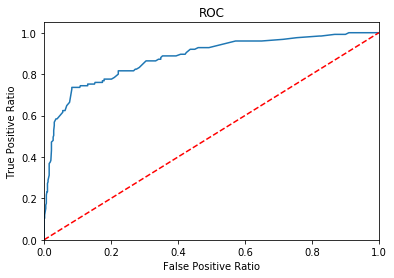

AUC : 0.7725414551607445


In [46]:
model.catmodel(X_train,X_test,y_train,y_test,LogisticRegression(solver = "liblinear"))

**Model with debt ratios only.**

In [47]:
X_ = dff[["debtinc_score"]]

y = dff["bad"]

In [48]:
X_encoded = pd.get_dummies(X_ , prefix_sep = '_')

In [49]:
from sklearn.preprocessing import LabelEncoder

y_encoded = LabelEncoder().fit_transform(y)

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y_encoded, test_size = 0.2, random_state = 42)
X_train.shape

(2860, 6)

In [51]:
model_deb = Model(dff)

Time  : 0.0
Confusion Matrix  :
[[533  58]
 [ 37  88]]
Accuracy  : 0.86731843575419
CV Score  : 0.8660602503912364
Model Report : 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       591
           1       0.60      0.70      0.65       125

    accuracy                           0.87       716
   macro avg       0.77      0.80      0.78       716
weighted avg       0.88      0.87      0.87       716



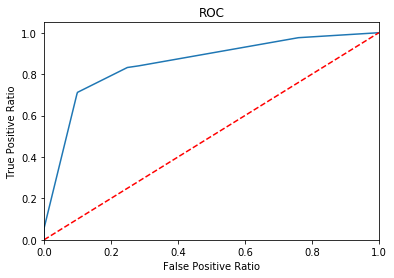

AUC : 0.8029306260575295


In [52]:
model_deb.catmodel(X_train,X_test,y_train,y_test,LogisticRegression(solver = "liblinear"))

# Decision Tree

In [53]:
dff.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc,derog_obj,delinq_obj,ninq_obj,debtinc_score
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042,no_neg,not_late,not_inq,D
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479,no_neg,not_late,not_inq,D
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354,no_neg,not_late,inq12,C
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992,no_neg,not_late,inq12,D
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327,no_neg,not_late,not_inq,D


**Model with debt ratios only.**

In [54]:
tre = Model(dff)

In [60]:
params = {   "min_samples_leaf" : [1,2,3,4] ,  
                "max_depth" : range(1,10),
                "min_samples_split" : [3,5,10,15,20,25,30]}

In [61]:
tre.Grid_CV(X_train,y_train,params,DecisionTreeClassifier())

Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2439 tasks      | elapsed:    8.5s


{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}


[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:    8.7s finished


Time  : 0.0
Confusion Matrix  :
[[533  58]
 [ 37  88]]
Accuracy  : 0.86731843575419
CV Score  : 0.8660602503912364
Model Report : 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       591
           1       0.60      0.70      0.65       125

    accuracy                           0.87       716
   macro avg       0.77      0.80      0.78       716
weighted avg       0.88      0.87      0.87       716



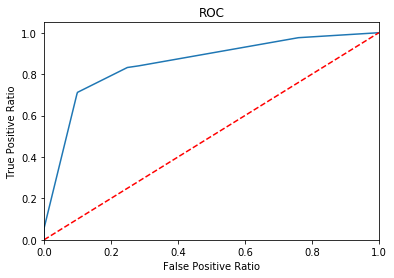

AUC : 0.8029306260575295


In [55]:
tre.catmodel(X_train,X_test,y_train,y_test,DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 1, min_samples_split = 3))

All variables included 

In [56]:
dms = pd.get_dummies(dff[["reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"]])
X_ = dff.drop(["bad","reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"],axis = 1)
X=pd.concat([X_,dms],axis=1)

y = dff["bad"]

In [57]:
from sklearn.preprocessing import LabelEncoder

y_encoded = LabelEncoder().fit_transform(y)

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 42)
X_train.shape

(2860, 33)

In [59]:
tre = Model(dff)

In [67]:
params = {   "min_samples_leaf" : [1,2,3,4] ,  
                "max_depth" : range(1,5),
                "min_samples_split" : [3,5,10,15,20,25,30]}

In [68]:
tre.Grid_CV(X_train,y_train,params,DecisionTreeClassifier())

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s


{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    6.2s finished


Time  : 0.015600100000000339
Confusion Matrix  :
[[553  38]
 [ 46  79]]
Accuracy  : 0.88268156424581
CV Score  : 0.8589788732394368
Model Report : 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       591
           1       0.68      0.63      0.65       125

    accuracy                           0.88       716
   macro avg       0.80      0.78      0.79       716
weighted avg       0.88      0.88      0.88       716



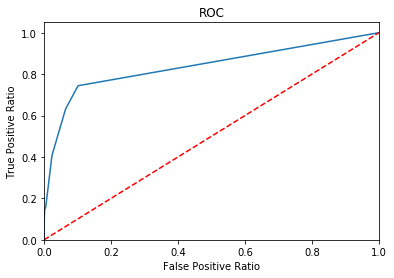

AUC : 0.7838510998307954


In [60]:
tre.catmodel(X_train,X_test,y_train,y_test,DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split = 3))

In [61]:
cart_model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split = 3).fit(X_train,y_train)

In [62]:
from matplotlib import pyplot as plt
from sklearn import tree

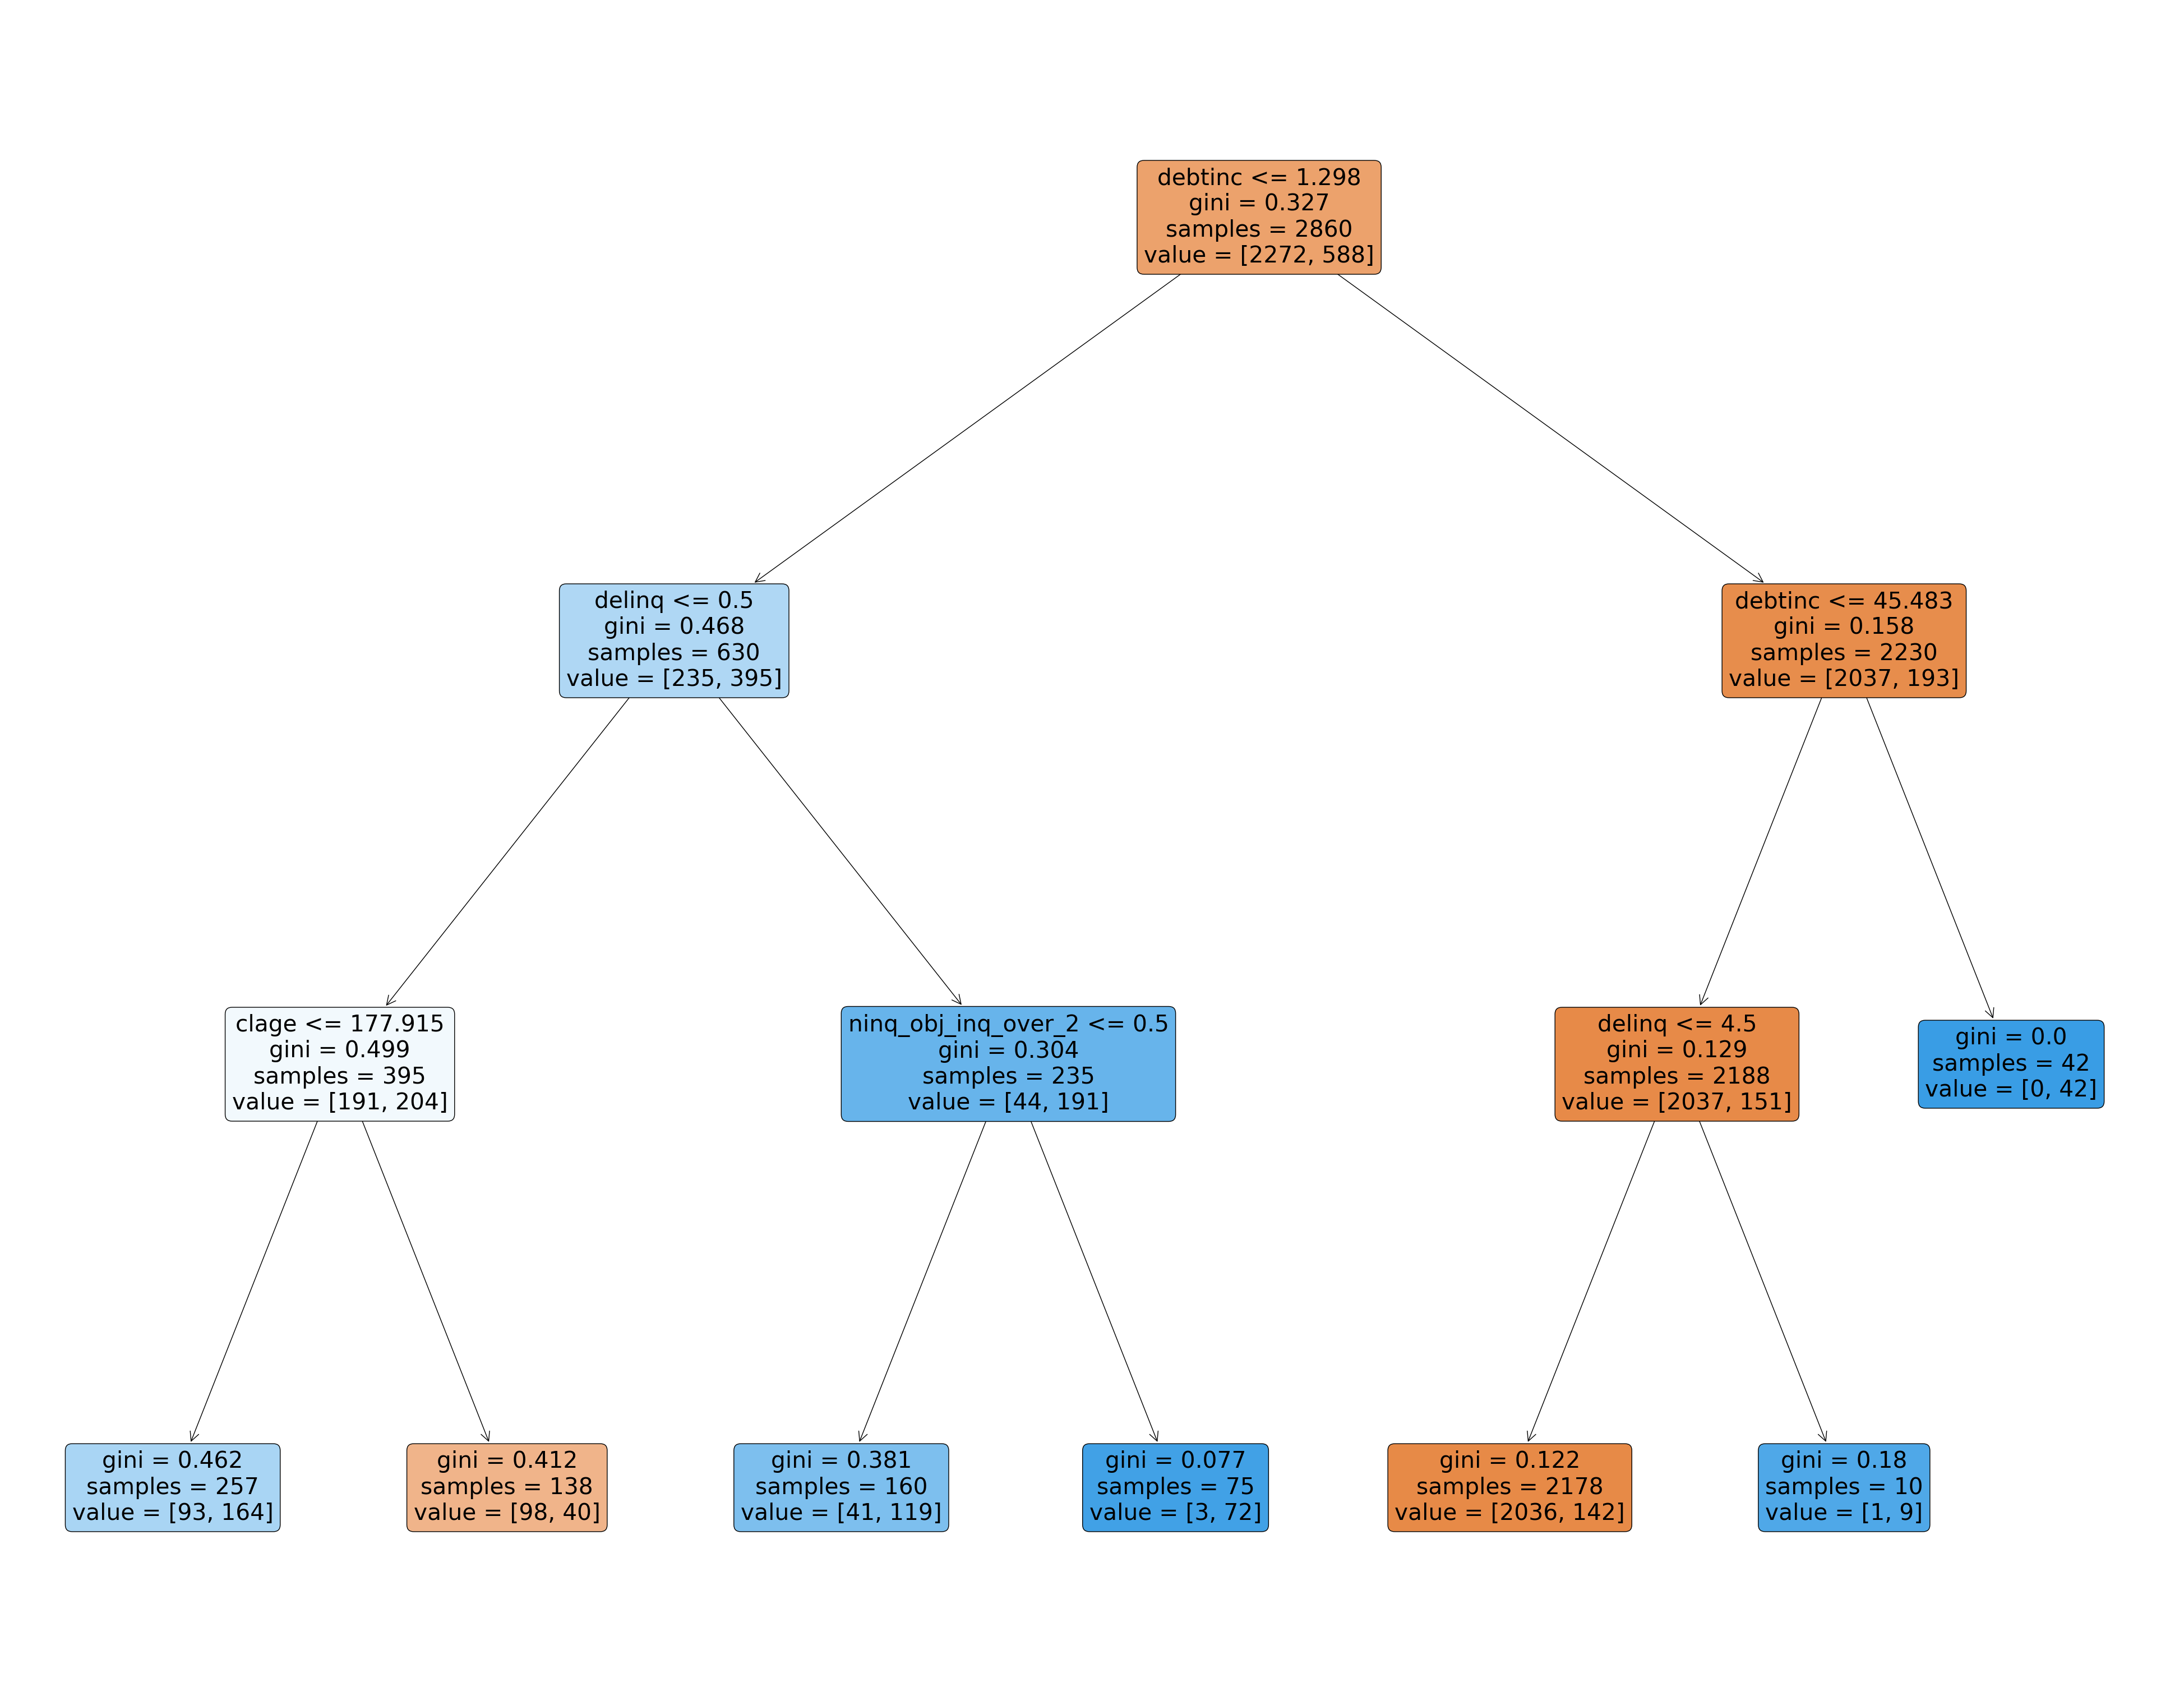

In [63]:
plt.figure(figsize=(50,40), dpi  = 100)
tree.plot_tree(cart_model,
               feature_names= X.columns,
              rounded = True,
              filled = True,
              impurity = True);


# Random Forest Classifier

In [64]:
dms = pd.get_dummies(dff[["reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"]])
X_ = dff.drop(["bad","reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"],axis = 1)
X=pd.concat([X_,dms],axis=1)

y = dff["bad"]

In [65]:
from sklearn.preprocessing import LabelEncoder

y_encoded = LabelEncoder().fit_transform(y)

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 42)
X_train.shape

(2860, 33)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [68]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9120111731843575

In [69]:
print(confusion_matrix(y_test,y_pred))

[[570  21]
 [ 42  83]]


In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       591
           1       0.80      0.66      0.72       125

    accuracy                           0.91       716
   macro avg       0.86      0.81      0.84       716
weighted avg       0.91      0.91      0.91       716



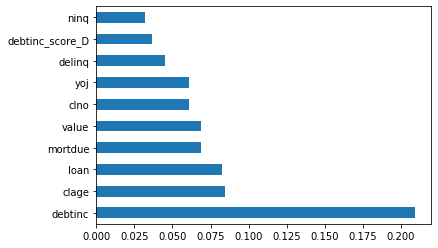

In [71]:
feature_importance = pd.Series(rf_model.feature_importances_,
                          index=X_train.columns)
feature_importance.nlargest(10).plot(kind= "barh")

In [81]:
params = {      "max_depth" : [2,3,5],
                "max_features": [2,3,5,8],
                "min_samples_split" : [2,5,10],
                "n_estimators": [100,300,500]
         }

In [72]:
cat = Model(dff)

In [83]:
cat.Grid_CV(X_train,y_train,params,RandomForestClassifier(random_state=42))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 13.5min finished


{'max_depth': 5, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 300}


Time  : 1.3884088999999982
Confusion Matrix  :
[[567  24]
 [ 49  76]]
Accuracy  : 0.8980446927374302
CV Score  : 0.8813967136150234
Model Report : 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       591
           1       0.76      0.61      0.68       125

    accuracy                           0.90       716
   macro avg       0.84      0.78      0.81       716
weighted avg       0.89      0.90      0.89       716



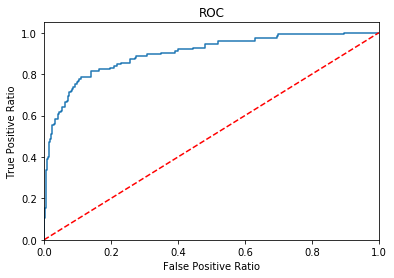

AUC : 0.7836954314720813


In [73]:
cat.catmodel(X_train,X_test,y_train,y_test,RandomForestClassifier(max_depth = 5, max_features =8, min_samples_split =5,n_estimators = 300,random_state=42))

# Neural Network

C:\Users\Taner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Time  : 9.687662100000004
Confusion Matrix  :
[[561  30]
 [ 93  32]]
Accuracy  : 0.8282122905027933


C:\Users\Taner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Taner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Taner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Taner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

CV Score  : 0.7822183098591549
Model Report : 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       591
           1       0.52      0.26      0.34       125

    accuracy                           0.83       716
   macro avg       0.69      0.60      0.62       716
weighted avg       0.80      0.83      0.80       716



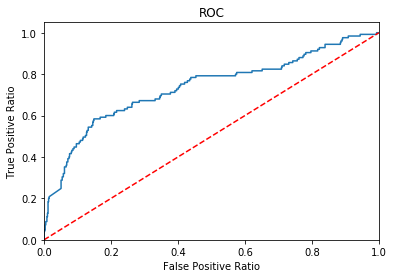

AUC : 0.6026192893401014


In [86]:
cat.catmodel(X_train,X_test,y_train,y_test,MLPClassifier(hidden_layer_sizes=(30,10)))

# Support Vector Machine

In [ ]:
#params = {   "C" : [1,2,3,4,5] ,  
      #       "kernel" : ["linear","rbf"]
    # }

In [77]:
# Because it took a long time, it was tried one by one.

In [1]:
cat.catmodel(X_train,X_test,y_train,y_test,SVC(kernel="linear",C=5))

NameError: name 'cat' is not defined

In [61]:
from sklearn.svm import SVC

In [62]:
svm_model = SVC(kernel="linear",C=5).fit(X_train,y_train)

In [63]:
svm_model

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
y_pred = svm_model.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred)

0.8547486033519553

In [66]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       591
           1       0.67      0.33      0.44       125

    accuracy                           0.85       716
   macro avg       0.77      0.65      0.68       716
weighted avg       0.84      0.85      0.83       716



# Boosting

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [48]:
gb_model = GradientBoostingClassifier().fit(X_train, y_train)
gb_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [67]:
params = {      "learning_rate" : [0.01,0.1,0.3,1],
                "n_estimators": [100,150,200,250,300,500],
                }

In [70]:
cat.Grid_CV(X_train,y_train,params,GradientBoostingClassifier())

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.9min finished


{'learning_rate': 0.3, 'n_estimators': 500}


Time  : 3.9624254000000008
Confusion Matrix  :
[[564  27]
 [ 40  85]]
Accuracy  : 0.9064245810055865
CV Score  : 0.8925665101721438
Model Report : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       591
           1       0.76      0.68      0.72       125

    accuracy                           0.91       716
   macro avg       0.85      0.82      0.83       716
weighted avg       0.90      0.91      0.90       716



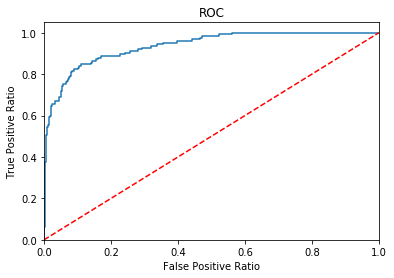

AUC : 0.8171573604060914


In [75]:
cat.catmodel(X_train,X_test,y_train,y_test,GradientBoostingClassifier(learning_rate=0.3,n_estimators = 500))

In [76]:
xgb_model = XGBClassifier().fit(X_train, y_train)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Time  : 7.1760459999999995
Confusion Matrix  :
[[572  19]
 [ 45  80]]
Accuracy  : 0.9106145251396648
CV Score  : 0.8925469483568076
Model Report : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       591
           1       0.81      0.64      0.71       125

    accuracy                           0.91       716
   macro avg       0.87      0.80      0.83       716
weighted avg       0.91      0.91      0.91       716



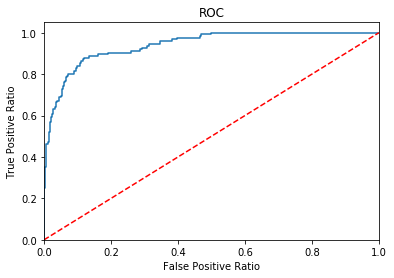

AUC : 0.8039255499153978


In [77]:
cat.catmodel(X_train,X_test,y_train,y_test,XGBClassifier())

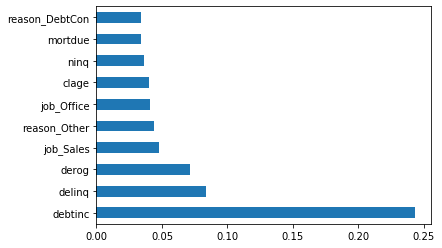

In [78]:
feature_importance = pd.Series(xgb_model.feature_importances_,
                          index=X_train.columns)
feature_importance.nlargest(10).plot(kind= "barh")

In [60]:
params = {      "learning_rate" : [0.01,0.1,0.3,1],
                "n_estimators": [100,150,200,250],
                }

In [61]:
cat.Grid_CV(X_train,y_train,params,XGBClassifier())

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  4.9min finished


{'learning_rate': 0.1, 'n_estimators': 150}


Time  : 3.884424899999992
Confusion Matrix  :
[[569  22]
 [ 43  82]]
Accuracy  : 0.909217877094972
CV Score  : 0.8953834115805946
Model Report : 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       591
           1       0.79      0.66      0.72       125

    accuracy                           0.91       716
   macro avg       0.86      0.81      0.83       716
weighted avg       0.91      0.91      0.91       716



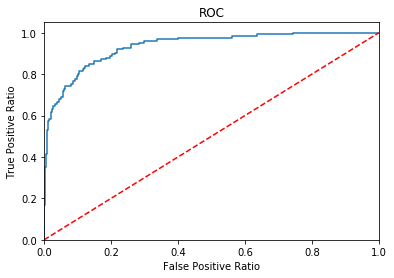

AUC : 0.8093874788494079


In [79]:
cat.catmodel(X_train,X_test,y_train,y_test,XGBClassifier(learning_rate = 0.1,n_estimators = 150))

# KNN

In [75]:
dms = pd.get_dummies(dff[["reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"]])
X_ = dff.drop(["bad","reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"],axis = 1)
X=pd.concat([X_,dms],axis=1)

y = dff["bad"]

In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 42)
X_train.shape

(2860, 33)

In [77]:
params = {"n_neighbors": np.arange(1,30)}

In [78]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.806993006993007
En iyi parametreler: {'n_neighbors': 23}


In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(23)
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

Time  : 0.031200200000000677
Confusion Matrix  :
[[589   2]
 [116   9]]
Accuracy  : 0.835195530726257
CV Score  : 0.8254499217527387
Model Report : 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       591
           1       0.82      0.07      0.13       125

    accuracy                           0.84       716
   macro avg       0.83      0.53      0.52       716
weighted avg       0.83      0.84      0.77       716



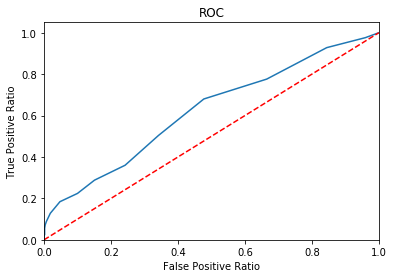

AUC : 0.5343079526226734


In [80]:
cat.catmodel(X_train,X_test,y_train,y_test,KNeighborsClassifier(23))